In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import spacy

/Users/davidhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/davidhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/var/folders/nj/q3yc88p55cj2crkvdf0038680000gn/T/ipykernel_22530/4242962397.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  im

In [2]:
file_path = 'final_analysis.csv'
df = pd.read_csv(file_path)

# Remove dollar signs and convert the column to numeric
df['price'] = pd.to_numeric(df['price'].str.replace('$', ''), errors='coerce')

# Drop specific columns (e.g., 'Price')
columns_to_drop = ['url', 'author_name', 'author_id', 'author_link', 'badge', 'review_images', 'helpful_count']
df = df.drop(columns=columns_to_drop)

df.head()

,product_name,product_rating,product_rating_object,product_rating_max,rating,asin,product_rating_count,product_reviews_number,review_header,review_id,review_text,brand,review_posted_date,review_country,price,Sentiment
0,Srhythm NC25 Wireless Headphones Bluetooth 5.3...,4.4,"{""five_star"":15,""four_star"":4,""one_star"":1,""th...",5.0,5.0,B07F62W3TQ,23473.0,6924.0,Good buy,R1VWG3RWHEKBDI,"The quality is nice, feels soft on the ears, t...",Srhythm,"August 7, 2023",United States,NaN,0.908950
1,SHOKZ OpenMove - Open-Ear Bluetooth Sport Head...,4.4,"{""five_star"":6,""four_star"":1,""one_star"":417,""t...",5.0,4.0,B09BW29FJS,9734.0,2412.0,It has a c charger,R2Q9B8C4XYUA99,Very clear sound and worked right out of the box,SHOKZ,"August 7, 2023",United States,NaN,0.908337
2,"Skullcandy Jib In-Ear Wired Earbuds, Microphon...",4.5,"{""five_star"":3,""four_star"":888,""one_star"":507,...",5.0,2.0,B07DGPSWY3,8511.0,1559.0,Meh sound,R2UOLVNK5MFQCB,Definitely low end quality ear buds. Wanted to...,Skullcandy,"March 18, 2023",United States,NaN,-0.899889
3,Compatible with BMW 325i / 328i Reusable & Was...,4.8,"{""five_star"":89,""four_star"":22,""one_star"":7,""t...",5.0,4.0,B06XXVYZQ4,169.0,43.0,Good but not the best,R7YGXFP00EVK,The air filter is great quality for the price....,Auto Dynasty,"December 12, 2019",United States,NaN,0.900748
4,Powerbeats Pro Wireless Earphones - Apple H1 H...,4.6,"{""five_star"":53902,""four_star"":6815,""one_star""...",5.0,5.0,B07WBTX9FH,68643.0,9943.0,I would buy again. Really like them.,R1CZO3BG0V1GD7,"I run, I chop wood, I do yard work. Not once h...",Beats,"January 12, 2022",United States,NaN,0.908849


In [3]:
#categorize the products by features/keywords and shove them into a category column

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform lemmatization on a product name
def lemmatize_product_name(product_name):
    if isinstance(product_name, str):
        doc = nlp(product_name)
        lemmas = [token.lemma_ for token in doc if not token.is_stop]
        return ' '.join(lemmas)
    else:
        return str(product_name)  # Convert non-string values to string

# Apply lemmatization to the entire 'product_name' column
df['lemmatized_product_name'] = df['product_name'].apply(lemmatize_product_name)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_product_name'])

# Apply k-means clustering
k = 10  # Number of clusters (you can adjust this based on your requirements)
kmeans = KMeans(n_clusters=k, random_state=42)
df['category'] = kmeans.fit_predict(tfidf_matrix)

# Display the DataFrame with the 'category' column
print(df)

                                           product_name  product_rating  \
0     Srhythm NC25 Wireless Headphones Bluetooth 5.3...             4.4   
1     SHOKZ OpenMove - Open-Ear Bluetooth Sport Head...             4.4   
2     Skullcandy Jib In-Ear Wired Earbuds, Microphon...             4.5   
3     Compatible with BMW 325i / 328i Reusable & Was...             4.8   
4     Powerbeats Pro Wireless Earphones - Apple H1 H...             4.6   
...                                                 ...             ...   
1495  Beats Solo3 Wireless On-Ear Headphones - Apple...             4.7   
1496  DOQAUS Bluetooth Headphones Over Ear, 52 Hours...             4.4   
1497  OneOdio Wired Over Ear Headphones Hi-Res Studi...             4.5   
1498  ZIUTY Wireless Earbuds, V5.3 Headphones 50H Pl...             4.8   
1499  Otium Bluetooth Headphones,Wireless Earbuds IP...             4.3   

                                  product_rating_object  product_rating_max  \
0     {"five_star":1

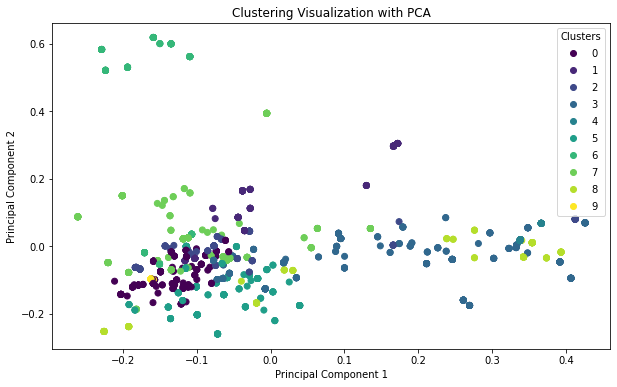

In [4]:


# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
df[['PC1', 'PC2']] = reduced_features

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['category'], cmap='viridis')
plt.title('Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

### PRICE and RATING ANALYSIS ###

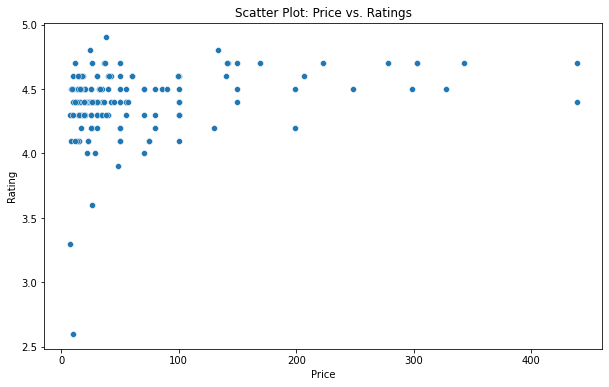

In [5]:
# Assuming df is your DataFrame with relevant columns, and 'Price' is one of them

# Scatter plot for Price vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='product_rating', data=df)
plt.title('Scatter Plot: Price vs. Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

In [11]:
df.columns.tolist()

['product_name',
 'product_rating',
 'product_rating_object',
 'product_rating_max',
 'rating',
 'asin',
 'product_rating_count',
 'product_reviews_number',
 'review_header',
 'review_id',
 'review_text',
 'brand',
 'review_posted_date',
 'review_country',
 'price',
 'Sentiment',
 'lemmatized_product_name',
 'category',
 'PC1',
 'PC2']

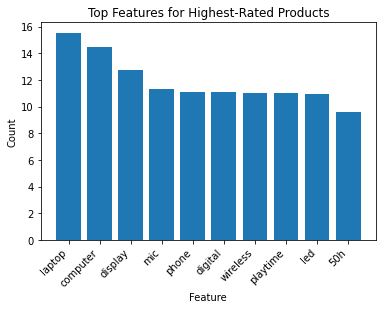

In [10]:
# Identify the highest-rated cluster
highest_rated_cluster = df.loc[df['rating'].idxmax()]['category']

# Extract feature names for the highest-rated cluster
highest_rated_features = tfidf_matrix[df['category'] == highest_rated_cluster].toarray()

# Count occurrences of each feature in the highest-rated cluster
feature_counts = highest_rated_features.sum(axis=0)

# Create a DataFrame with feature names and their counts
features_count_df = pd.DataFrame({'Feature': tfidf_vectorizer.get_feature_names_out(), 'Count': feature_counts})

# Sort the DataFrame by count in descending order
features_count_df = features_count_df.sort_values(by='Count', ascending=False)

# Visualize the most common features
top_features = 10  # You can adjust this based on the number of features you want to visualize
plt.bar(features_count_df['Feature'][:top_features], features_count_df['Count'][:top_features])
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Top Features for Highest-Rated Products')
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
df.columns.tolist()

['product_name',
 'product_rating',
 'product_rating_object',
 'product_rating_max',
 'rating',
 'asin',
 'product_rating_count',
 'product_reviews_number',
 'review_header',
 'review_id',
 'review_text',
 'brand',
 'review_posted_date',
 'review_country',
 'price',
 'Sentiment',
 'lemmatized_product_name',
 'category',
 'PC1',
 'PC2']

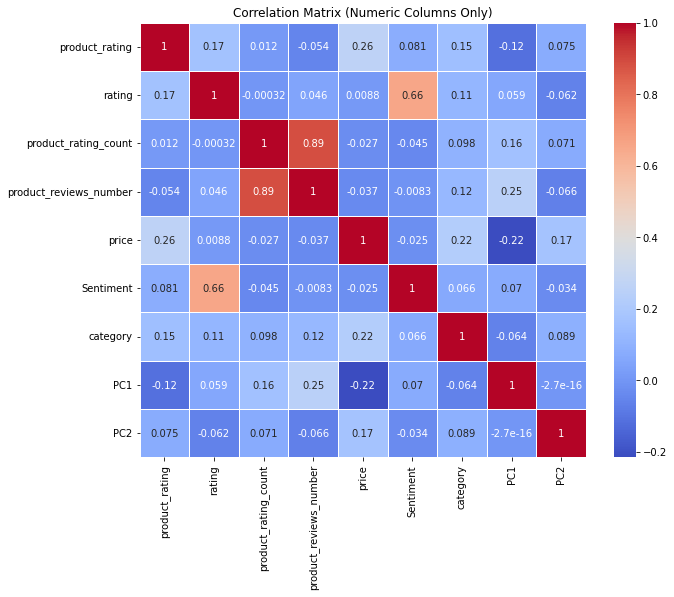

In [8]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

column_to_remove = 'product_rating_max'
correlation_matrix = correlation_matrix.drop(column_to_remove, axis=0)  # Drop the row
correlation_matrix = correlation_matrix.drop(column_to_remove, axis=1)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

In [12]:
#Violin plots combine aspects of box plots and kernel density plots, providing a more detailed view of the distribution of prices for different categories.
# Select the high-scoring features
selected_features = ['laptop', 'computer', 'mic', 'phone', 'digital', 'playtime', 'wireless', 'led', '50hz']  # Add more features as needed

# Melt the DataFrame to long format for Seaborn
df_melted = pd.melt(df, id_vars=['lemmatized_product_name', 'price', 'category'],
                    value_vars=selected_features, var_name='Feature', value_name='Score')

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Feature', y='price', hue='category', data=df_melted, inner='quartile', palette='viridis')
plt.title('Price Distribution for Products with High-Scoring Features in Different Categories')
plt.xlabel('Features')
plt.ylabel('Price')
plt.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['laptop', 'computer', 'mic', 'phone', 'digital', 'playtime', 'wireless', 'led', '50hz']"

In [ ]:
#Use bar charts to compare the average price across different categories.
plt.figure(figsize=(12, 8))
sns.barplot(x='airconditioning', y='price', data=df, ci=None)
plt.title('Bar Chart: Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a scatter plot for rating vs. review count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='parking', y='stories', data=df, color='skyblue')
plt.title('Scatter Plot: Rating vs. Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

### Sentiment Analysis ###

/var/folders/nj/q3yc88p55cj2crkvdf0038680000gn/T/ipykernel_22530/1446688110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts, palette='viridis')


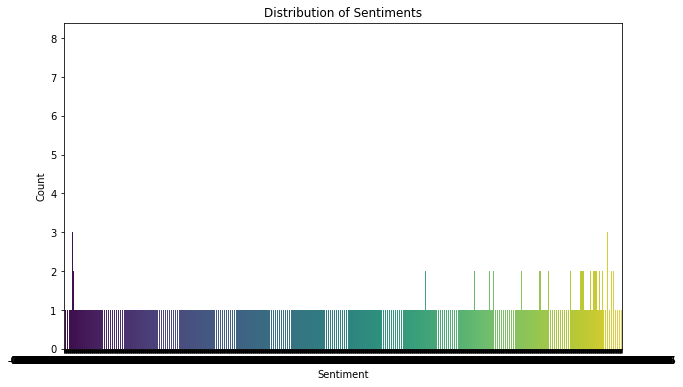

In [13]:
# Count the occurrences of each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Top Rated and Most Reviewed Products ###

In [ ]:
# Function to categorize products based on keywords
def categorize_product(lemmatized_product_name):
    if 'sweat resistant' in lemmatized_product_name:
        return 'Sweat Resistant'
    elif 'bluetooth' in lemmatized_product_name:
        return 'Bluetooth'
    elif 'wireless' in lemmatized_product_name:
        return 'Wireless'
    else:
        return 'Other'

# Apply categorization to create a 'Categories' column
df['Category'] = df['LemmatizedProductName'].apply(categorize_product)

In [ ]:
# Identify top-rated products

top_rated_products = df.nlargest(10, 'product_rating')  # Assuming you want the top 10

# Bar chart for top-rated products
plt.figure(figsize=(12, 8))
sns.barplot(x='product_rating', y='lemmatized_product_name', data=top_rated_products, palette='viridis')
plt.title('Top-Rated Products')
plt.xlabel('Rating')
plt.ylabel('Product Name')
plt.show()

# Pie chart for category distribution
category_distribution = df['Category'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Category Distribution of Products')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with 'ProductName' and 'Sentiment' columns
data = {'ProductName': ["Genofo Open-Ear Bluetooth Bone Conduction Sport Headphones - Sweat Resistant Wireless Earphones for Workouts and Running - Built-in Mic (Black)",
                         "Another Product with Negative Sentiment",
                         "Positive Experience with Another Product",
                         "Yet Another Product with Negative Feedback"],
        'Sentiment': ['Positive', 'Negative', 'Positive', 'Negative']}

df = pd.DataFrame(data)

# Function to generate word cloud for a given sentiment
def generate_word_cloud(sentiment):
    product_names = ' '.join(df[df['Sentiment'] == sentiment]['ProductName'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(product_names)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Product Names')
    plt.show()

# Generate word cloud for positive product names
generate_word_cloud('Positive')

# Generate word cloud for negative product names
generate_word_cloud('Negative')